In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression as Lr
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import api as smf
from sklearn.linear_model import LinearRegression

In [2]:
regressor = LinearRegression()

In [3]:
def adjust(data,col,addition):
    df_mid = pd.get_dummies(data[col], prefix=addition)
    locs = np.where(data.columns.values == col)[0]
    for i in range(df_mid.shape[1]):
        data.insert(int(locs)+i,value=df_mid.iloc[:, i],column=tuple(df_mid.columns)[i])
    del data[col]
    return data

In [4]:
df_por = pd.read_csv('student-por.csv',sep=';')

In [5]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
df_por = adjust(df_por,'school','Type')

df_por = adjust(df_por,'sex','Gender')

df_por = adjust(df_por,'address','Geo')

df_por = adjust(df_por,'famsize','Fam')

In [10]:
df_por

,Type_GP,Type_MS,Gender_F,Gender_M,age,Geo_R,Geo_U,Fam_GT3,Fam_LE3,Pstatus,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,1,0,18,0,1,1,0,A,...,4,3,4,1,1,3,4,0,11,11
1,1,0,1,0,17,0,1,1,0,T,...,5,3,3,1,1,3,2,9,11,11
2,1,0,1,0,15,0,1,0,1,T,...,4,3,2,2,3,3,6,12,13,12
3,1,0,1,0,15,0,1,1,0,T,...,3,2,2,1,1,5,0,14,14,14
4,1,0,1,0,16,0,1,1,0,T,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,19,1,0,1,0,T,...,5,4,2,1,2,5,4,10,11,10
645,0,1,1,0,18,0,1,0,1,T,...,4,3,4,1,1,1,4,15,15,16
646,0,1,1,0,18,0,1,1,0,T,...,1,1,1,1,1,5,6,11,12,9
647,0,1,0,1,17,0,1,0,1,T,...,2,4,5,3,4,2,6,10,10,10


In [11]:
df_por = adjust(df_por, 'Pstatus', 'with_Parent')

In [12]:
df_por

,Type_GP,Type_MS,Gender_F,Gender_M,age,Geo_R,Geo_U,Fam_GT3,Fam_LE3,with_Parent_A,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,1,0,18,0,1,1,0,1,...,4,3,4,1,1,3,4,0,11,11
1,1,0,1,0,17,0,1,1,0,0,...,5,3,3,1,1,3,2,9,11,11
2,1,0,1,0,15,0,1,0,1,0,...,4,3,2,2,3,3,6,12,13,12
3,1,0,1,0,15,0,1,1,0,0,...,3,2,2,1,1,5,0,14,14,14
4,1,0,1,0,16,0,1,1,0,0,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,19,1,0,1,0,0,...,5,4,2,1,2,5,4,10,11,10
645,0,1,1,0,18,0,1,0,1,0,...,4,3,4,1,1,1,4,15,15,16
646,0,1,1,0,18,0,1,1,0,0,...,1,1,1,1,1,5,6,11,12,9
647,0,1,0,1,17,0,1,0,1,0,...,2,4,5,3,4,2,6,10,10,10


In [15]:
df_por.columns

Index(['Type_GP', 'Type_MS', 'Gender_F', 'Gender_M', 'age', 'Geo_R', 'Geo_U',
       'Fam_GT3', 'Fam_LE3', 'with_Parent_A', 'with_Parent_T', 'Medu', 'Fedu',
       'Mother_work_at_home', 'Mother_work_health', 'Mother_work_other',
       'Mother_work_services', 'Mother_work_teacher', 'Father_work_at_home',
       'Father_work_health', 'Father_work_other', 'Father_work_services',
       'Father_work_teacher', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df_por = adjust(df_por,'Fjob', 'Father_work')

df_por = adjust(df_por,'Mjob','Mother_work')

df_por = adjust(df_por, 'reason', 'To_choose')

df_por = adjust(df_por,'guardian','Liveswith')

df_por = adjust(df_por,'schoolsup','Support')

df_por = adjust(df_por,'famsup','FamilySupport')

df_por = adjust(df_por,'paid','Extra_Paid')

df_por = adjust(df_por,'activities','Extra_Activities')

df_por = adjust(df_por,'nursery','Attended_nursery')

df_por = adjust(df_por,'higher','Want_more_study')

In [23]:
df_por.columns

Index(['Type_GP', 'Type_MS', 'Gender_F', 'Gender_M', 'age', 'Geo_R', 'Geo_U',
       'Fam_GT3', 'Fam_LE3', 'with_Parent_A', 'with_Parent_T', 'Medu', 'Fedu',
       'Mother_work_at_home', 'Mother_work_health', 'Mother_work_other',
       'Mother_work_services', 'Mother_work_teacher', 'Father_work_at_home',
       'Father_work_health', 'Father_work_other', 'Father_work_services',
       'Father_work_teacher', 'To_choose_course', 'To_choose_home',
       'To_choose_other', 'To_choose_reputation', 'Liveswith_father',
       'Liveswith_mother', 'Liveswith_other', 'traveltime', 'studytime',
       'failures', 'Support_no', 'Support_yes', 'FamilySupport_no',
       'FamilySupport_yes', 'Extra_Paid_no', 'Extra_Paid_yes',
       'Extra_Activities_no', 'Extra_Activities_yes', 'Attended_nursery_no',
       'Attended_nursery_yes', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [25]:
df_por.columns

Index(['Type_GP', 'Type_MS', 'Gender_F', 'Gender_M', 'age', 'Geo_R', 'Geo_U',
       'Fam_GT3', 'Fam_LE3', 'with_Parent_A', 'with_Parent_T', 'Medu', 'Fedu',
       'Mother_work_at_home', 'Mother_work_health', 'Mother_work_other',
       'Mother_work_services', 'Mother_work_teacher', 'Father_work_at_home',
       'Father_work_health', 'Father_work_other', 'Father_work_services',
       'Father_work_teacher', 'To_choose_course', 'To_choose_home',
       'To_choose_other', 'To_choose_reputation', 'Liveswith_father',
       'Liveswith_mother', 'Liveswith_other', 'traveltime', 'studytime',
       'failures', 'Support_no', 'Support_yes', 'FamilySupport_no',
       'FamilySupport_yes', 'Extra_Paid_no', 'Extra_Paid_yes',
       'Extra_Activities_no', 'Extra_Activities_yes', 'Attended_nursery_no',
       'Attended_nursery_yes', 'Want_more_study_no', 'Want_more_study_yes',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3']

In [26]:
df_por = adjust(df_por,'internet','Home_internet')

In [27]:
df_por.absences = df_por.absences/93

In [28]:
df_por = adjust(df_por,'romantic','Relations')

In [29]:
y = df_por.iloc[:,-1]

In [30]:
x = df_por.iloc[:,:-1]

In [31]:
x

,Type_GP,Type_MS,Gender_F,Gender_M,age,Geo_R,Geo_U,Fam_GT3,Fam_LE3,with_Parent_A,...,Relations_yes,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1,0,1,0,18,0,1,1,0,1,...,0,4,3,4,1,1,3,0.043011,0,11
1,1,0,1,0,17,0,1,1,0,0,...,0,5,3,3,1,1,3,0.021505,9,11
2,1,0,1,0,15,0,1,0,1,0,...,0,4,3,2,2,3,3,0.064516,12,13
3,1,0,1,0,15,0,1,1,0,0,...,1,3,2,2,1,1,5,0.000000,14,14
4,1,0,1,0,16,0,1,1,0,0,...,0,4,3,2,1,2,5,0.000000,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,19,1,0,1,0,0,...,0,5,4,2,1,2,5,0.043011,10,11
645,0,1,1,0,18,0,1,0,1,0,...,0,4,3,4,1,1,1,0.043011,15,15
646,0,1,1,0,18,0,1,1,0,0,...,0,1,1,1,1,1,5,0.064516,11,12
647,0,1,0,1,17,0,1,0,1,0,...,0,2,4,5,3,4,2,0.064516,10,10


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state=42)

In [34]:
x_train

,Type_GP,Type_MS,Gender_F,Gender_M,age,Geo_R,Geo_U,Fam_GT3,Fam_LE3,with_Parent_A,...,Relations_yes,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
300,1,0,1,0,18,0,1,1,0,0,...,1,3,1,2,1,3,2,0.021505,15,15
350,1,0,0,1,19,1,0,0,1,0,...,1,4,3,1,1,1,5,0.000000,9,10
557,0,1,1,0,17,1,0,1,0,0,...,1,5,4,4,1,1,5,0.021505,7,9
163,1,0,0,1,18,0,1,0,1,0,...,1,2,3,5,2,5,4,0.000000,11,9
493,0,1,1,0,17,0,1,1,0,0,...,0,2,4,4,3,5,5,0.053763,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,0,1,15,0,1,1,0,0,...,0,3,3,3,1,1,3,0.000000,11,9
106,1,0,1,0,15,0,1,1,0,0,...,0,5,1,2,1,1,3,0.043011,10,10
270,1,0,0,1,16,0,1,1,0,0,...,0,5,3,2,1,2,5,0.043011,14,15
435,0,1,1,0,15,1,0,0,1,0,...,0,5,4,3,1,2,4,0.000000,10,10


In [35]:
import statsmodels.regression.linear_model as smf

In [36]:
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [37]:
y = df_por['G3']

In [38]:
del df_por['G3']

In [39]:
x = [x for x in range(x_train.shape[1])]

In [40]:
temp = x_train.copy()
temp_x = temp.values
selector = temp_x.copy()
regressor_ols = smf.OLS(endog = y_train, exog = temp_x).fit()

In [41]:
for i in range(len(x)-1):
    if float(regressor_ols.pvalues.max()) > 0.05:
        del x[np.argmax(regressor_ols.pvalues)]
        temp_x = selector[:, x]
        regressor_ols = smf.OLS(endog= y_train, exog=temp_x).fit()
    else:
        break

In [42]:
df_por.iloc[:,x]

,To_choose_other,failures,absences,G1,G2
0,0,0,0.043011,0,11
1,0,0,0.021505,9,11
2,1,0,0.064516,12,13
3,0,0,0.000000,14,14
4,0,0,0.000000,11,13
...,...,...,...,...,...
644,0,1,0.043011,10,11
645,0,0,0.043011,15,15
646,0,0,0.064516,11,12
647,0,0,0.064516,10,10


In [43]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     G3   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          1.038e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):                        0.00
Time:                        23:01:09   Log-Likelihood:                         -975.61
No. Observations:                 584   AIC:                                      1961.
Df Residuals:                     579   BIC:                                      1983.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4398      0.172     -2.560      0.011      -0.777      -0.102
x2            -0.2435      0.091     -2.681      0.008      -0.422      -0.065
x3             2.1420      1.026      2.087      0.037       0.127       4.157
x4             0.1479      0.036      4.146      0.000       0.078       0.218
x5             0.8839      0.035     25.251      0.000       0.815       0.953
==============================================================================
Omnibus:                      404.142   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8042.920
Skew:                          -2.767   Prob(JB):                         0.00
Kurtosis:                      20.318   Cond. No.                         318.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
regressor.fit(x_train.iloc[:,x], y_train)

LinearRegression()

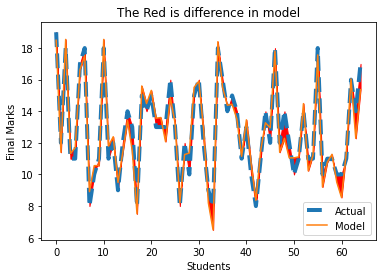

In [56]:
plt.plot(range(len(y_test)), y_test,linewidth=4,linestyle='dashed')
plt.plot(range(len(y_test)),regressor.predict(x_test.iloc[:,x]))
plt.fill_between(range(len(y_test)),y_test,regressor.predict(x_test.iloc[:,x]),color='r')
plt.title('The Red is difference in model')
plt.xlabel('Students')
plt.ylabel('Final Marks')
plt.legend(['Actual','Model'])
plt.show()

## Number of failures has high coef in linear regression